<a href="https://colab.research.google.com/github/anagha1999/anlp-project/blob/main/kannada/3.Moral_Foundations_Kannada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pickle
with open('kannada_mfd_embeddings.pkl', 'rb') as f:
    word_embeddings_kannada = pickle.load(f)

In [35]:
with open('kannada_master_moral_vectors.pkl', 'rb') as f:
    master_moral_vectors_kannada = pickle.load(f)
print("Master Moral Vectors:")
for foundation, vector in master_moral_vectors_kannada.items():
    print(f"{foundation}: {vector[:5]}...") # Print first 5 elements for brevity

Master Moral Vectors:
care.virtue: [-0.02135082  0.00476674 -0.02135747 -0.00789052 -0.00298211]...
care.vice: [-0.0148483  -0.00354319 -0.00266822 -0.00440087 -0.00528908]...
fairness.virtue: [-1.8055458e-02  1.9088031e-05 -1.2553891e-02 -7.4664387e-03
 -7.5386680e-04]...
fairness.vice: [ 0.00060142 -0.00666357  0.0049056  -0.00882086 -0.01116754]...
loyalty.virtue: [-0.01397081  0.00125469 -0.00201792 -0.00619728  0.00406831]...
loyalty.vice: [-0.0074658  -0.01019229 -0.00417494 -0.01001331 -0.01169472]...
authority.virtue: [-0.01501316  0.00724985 -0.00475638 -0.00563351  0.00163498]...
authority.vice: [-0.00989635 -0.00283136  0.0064146  -0.00367917 -0.00770031]...
sanctity.virtue: [-0.01555017  0.00501097 -0.00028921 -0.00474411 -0.01167175]...
sanctity.vice: [-0.00774913 -0.00292883  0.01794935 -0.0074064  -0.00547204]...


In [36]:
import pickle
import os

# Define the file path for loading the embeddings
embeddings_file_path = 'kannada_texts_embeddings.pkl'
file_embeddings = {}
# Check if the file exists before attempting to load
if os.path.exists(embeddings_file_path):
    # Load the file_embeddings dictionary from the pickle file
    with open(embeddings_file_path, 'rb') as f:
        file_embeddings = pickle.load(f)

    print(f"Successfully loaded paragraph embeddings from {embeddings_file_path}")
    print(f"Number of files with embeddings loaded: {len(file_embeddings)}")
    # Optionally, print a sample to verify
    if file_embeddings:
        first_filename = list(file_embeddings.keys())[0]
        print(f"Example: Embeddings shape for '{first_filename}': {file_embeddings[first_filename].shape}")
else:
    print(f"Error: Embeddings file not found at {embeddings_file_path}")
    file_embeddings = {} # Initialize as empty to prevent further errors

Successfully loaded paragraph embeddings from kannada_texts_embeddings.pkl
Number of files with embeddings loaded: 2
Example: Embeddings shape for '2-niti-kathegalu.txt': (216, 768)


# Task
Calculate the cosine similarity between each paragraph embedding in `file_embeddings` and each master moral vector in `master_moral_vectors_kannada`. Consolidate all paragraph embeddings and `master_moral_vectors_kannada` into separate NumPy arrays. Apply PCA to reduce their dimensionality to 2D. Finally, generate a plot to visualize the reduced-dimension paragraph embeddings and master moral vectors.

## Calculate Cosine Similarities

### Subtask:
For each paragraph embedding, calculate its cosine similarity with each of the 'master_moral_vectors_kannada'. Store these similarities in a structured dictionary, mapping each paragraph to its moral foundation scores.


**Reasoning**:
I need to import the `cosine_similarity` function from `sklearn.metrics.pairwise` to calculate the similarities between paragraph embeddings and master moral vectors. This is the first instruction to fulfill the subtask.



In [37]:
from sklearn.metrics.pairwise import cosine_similarity

print("Imported cosine_similarity from sklearn.metrics.pairwise.")

Imported cosine_similarity from sklearn.metrics.pairwise.


**Reasoning**:
Now that `cosine_similarity` is imported, I will proceed with iterating through the paragraph embeddings and master moral vectors to calculate and store their cosine similarities as instructed.



In [38]:
with open('kannada_mfd.pkl', 'rb') as f:
    translated_dictionary_kannada = pickle.load(f)

In [19]:
from sentence_transformers import SentenceTransformer
EMBEDDINGS_MODEL_NAME='l3cube-pune/indic-sentence-similarity-sbert'
model = SentenceTransformer(EMBEDDINGS_MODEL_NAME)

/Users/anagha/Documents/Fall 2025/anlp-project/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
paragraph_moral_scores = {}

# Iterate through each file and its embeddings
for filename, embeddings_array in file_embeddings.items():
    # Iterate through each paragraph embedding in the array
    for i, paragraph_embedding in enumerate(embeddings_array):
        current_paragraph_scores = {}
        # Iterate through each master moral vector
        for foundation, master_vector in master_moral_vectors_kannada.items():
            # Reshape for cosine_similarity function (expects 2D arrays)
            paragraph_embedding_reshaped = paragraph_embedding.reshape(1, -1)
            master_vector_reshaped = master_vector.reshape(1, -1)

            # Calculate cosine similarity
            similarity = cosine_similarity(paragraph_embedding_reshaped, master_vector_reshaped)[0][0]
            current_paragraph_scores[foundation] = similarity

        # Store the scores for the current paragraph
        paragraph_moral_scores[(filename, i)] = current_paragraph_scores

print(f"Calculated moral scores for {len(paragraph_moral_scores)} paragraphs.")
print("Example for the first paragraph:")
if paragraph_moral_scores:
    first_key = list(paragraph_moral_scores.keys())[0]
    print(f"  Key: {first_key}")
    print(f"  Scores: {paragraph_moral_scores[first_key]}")

Calculated moral scores for 436 paragraphs.
Example for the first paragraph:
  Key: ('2-niti-kathegalu.txt', 0)
  Scores: {'care.virtue': np.float32(0.44273978), 'care.vice': np.float32(0.3045985), 'fairness.virtue': np.float32(0.34528637), 'fairness.vice': np.float32(0.2670318), 'loyalty.virtue': np.float32(0.32343704), 'loyalty.vice': np.float32(0.26220477), 'authority.virtue': np.float32(0.4226789), 'authority.vice': np.float32(0.24541333), 'sanctity.virtue': np.float32(0.4463393), 'sanctity.vice': np.float32(0.37223577)}


## Prepare Data for PCA

### Subtask:
Consolidate all paragraph embeddings and master moral vectors into separate NumPy arrays. Apply PCA to reduce their dimensionality to 2D.

### Reasoning:
Before applying PCA, all embeddings and master moral vectors need to be collected into single NumPy arrays. This will facilitate the dimensionality reduction process.

**Reasoning**:
I need to consolidate all paragraph embeddings from the `file_embeddings` dictionary into a single NumPy array. This array will then be used as input for PCA.



In [31]:
import numpy as np

# Consolidate all paragraph embeddings into a single NumPy array
all_paragraph_embeddings_list = []
for filename, embeddings_array in file_embeddings.items():
    if embeddings_array.size > 0:
        all_paragraph_embeddings_list.append(embeddings_array)

if all_paragraph_embeddings_list:
    all_paragraph_embeddings = np.vstack(all_paragraph_embeddings_list)
    print(f"Consolidated all paragraph embeddings. Total shape: {all_paragraph_embeddings.shape}")
else:
    all_paragraph_embeddings = np.array([])
    print("No paragraph embeddings found to consolidate.")

Consolidated all paragraph embeddings. Total shape: (436, 768)


**Reasoning**:
Now that the paragraph embeddings are consolidated, I need to consolidate the `master_moral_vectors_kannada` dictionary into a single NumPy array to prepare it for PCA, as specified in the subtask.



In [ ]:
master_moral_vectors_array = np.array(list(master_moral_vectors_kannada.values()))

print(f"Consolidated master moral vectors. Total shape: {master_moral_vectors_array.shape}")

Consolidated master moral vectors. Total shape: (10, 768)


**Reasoning**:
Now that both paragraph embeddings and master moral vectors are consolidated into NumPy arrays, the next step is to apply PCA to reduce their dimensionality to 2D, as specified in the subtask. I will first import PCA, combine the arrays, apply PCA, and then separate them again.



In [ ]:
from sklearn.decomposition import PCA

# Combine all embeddings for consistent PCA application
all_data = np.vstack((all_paragraph_embeddings, master_moral_vectors_array))

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_data)

# Separate the reduced data back into paragraph embeddings and master moral vectors
reduced_paragraph_embeddings = reduced_data[:len(all_paragraph_embeddings)]
reduced_master_moral_vectors = reduced_data[len(all_paragraph_embeddings):]

print(f"Reduced paragraph embeddings shape: {reduced_paragraph_embeddings.shape}")
print(f"Reduced master moral vectors shape: {reduced_master_moral_vectors.shape}")

Reduced paragraph embeddings shape: (436, 2)
Reduced master moral vectors shape: (10, 2)


## Visualize Reduced Embeddings and Master Moral Vectors

### Subtask:
Generate a plot to visualize the reduced-dimension paragraph embeddings and master moral vectors.

### Reasoning:
To visually inspect the relationships between paragraphs and moral foundations after dimensionality reduction, a scatter plot will be generated. This plot will display the 2D representations of both the paragraph embeddings and the master moral vectors, allowing for an intuitive understanding of their proximity in the reduced space.

**Reasoning**:
To visualize the reduced-dimension paragraph embeddings and master moral vectors, I need to use a plotting library like matplotlib.pyplot to create a scatter plot. I will plot both sets of reduced data and label the master moral vectors for clarity.



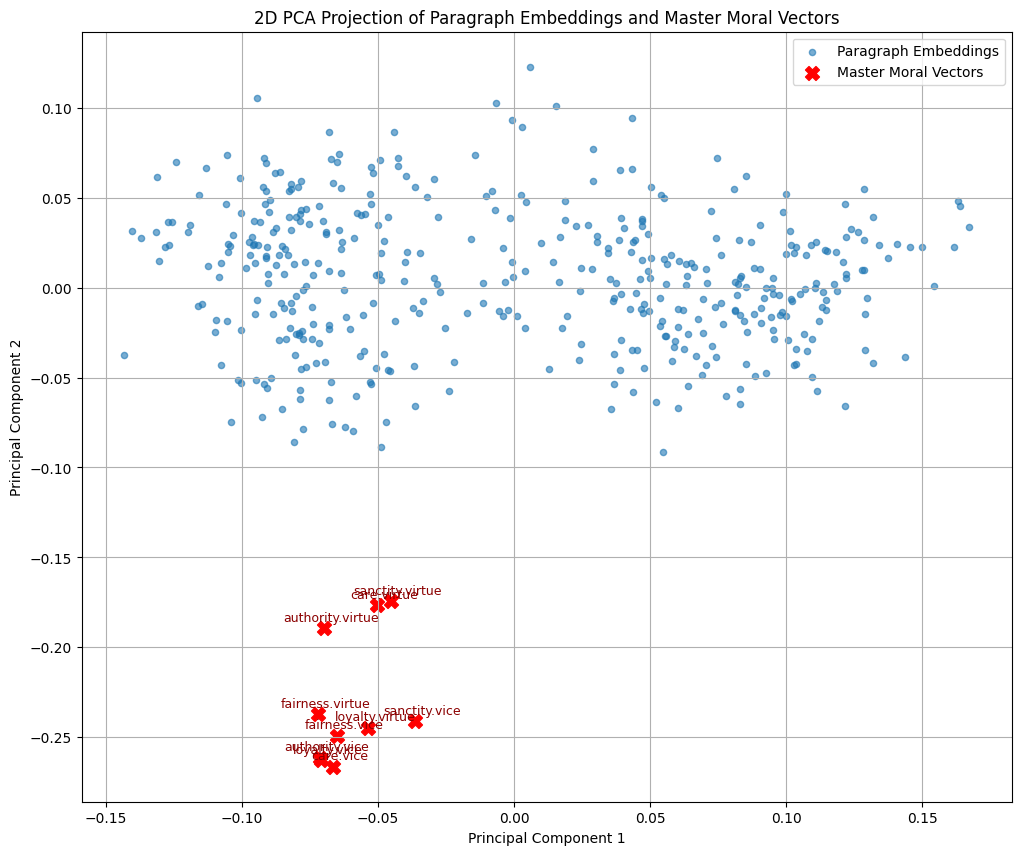

Generated PCA plot showing paragraph embeddings and master moral vectors.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plot reduced paragraph embeddings
plt.scatter(
    reduced_paragraph_embeddings[:, 0],
    reduced_paragraph_embeddings[:, 1],
    alpha=0.6,
    label='Paragraph Embeddings',
    s=20 # Smaller size for paragraph points
)

# Plot reduced master moral vectors
plt.scatter(
    reduced_master_moral_vectors[:, 0],
    reduced_master_moral_vectors[:, 1],
    color='red',
    s=100, # Larger size for master moral vector points
    marker='X', # Distinct marker for master moral vectors
    label='Master Moral Vectors'
)

# Annotate master moral vectors with their foundation names
for i, foundation_name in enumerate(master_moral_vectors_kannada.keys()):
    plt.annotate(
        foundation_name,
        (reduced_master_moral_vectors[i, 0], reduced_master_moral_vectors[i, 1]),
        textcoords="offset points",
        xytext=(5,5),
        ha='center',
        fontsize=9,
        color='darkred'
    )

plt.title('2D PCA Projection of Paragraph Embeddings and Master Moral Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
print("Generated PCA plot showing paragraph embeddings and master moral vectors.")

## Summary:

### Data Analysis Key Findings
*   Cosine similarity scores were successfully calculated for 436 paragraph embeddings against 10 master moral vectors. Each paragraph's scores were stored in a dictionary.
*   All paragraph embeddings were consolidated into a single NumPy array of shape (436, 768), and the master moral vectors were consolidated into an array of shape (10, 768).
*   Principal Component Analysis (PCA) successfully reduced the dimensionality of both the paragraph embeddings and master moral vectors to 2D, resulting in shapes of (436, 2) and (10, 2) respectively.
*   A 2D scatter plot was generated, visually representing the reduced-dimension paragraph embeddings and the master moral vectors, with the latter clearly labeled.

### Insights or Next Steps
*   The generated 2D PCA plot can be used to visually identify clusters of paragraphs that align with specific moral foundations or to observe the proximity of paragraphs to different master moral vectors, offering an intuitive understanding of their thematic content.
*   Further analysis could involve quantitatively measuring the distance between paragraph clusters and master moral vectors in the reduced space, or using clustering algorithms on the paragraph embeddings (either in their original or reduced dimension) to identify inherent groupings and then correlating these groupings with their highest-scoring moral foundations.


# Task
## Aggregate Moral Scores per Text

### Subtask:
For each text (filename), consolidate the cosine similarity scores of all its paragraphs by averaging the scores for each moral foundation across all paragraphs belonging to that text.

### Reasoning:
I will iterate through the `paragraph_moral_scores` dictionary. For each `(filename, paragraph_index)` key, I will accumulate the moral scores for each foundation, grouped by `filename`. After processing all paragraphs, I will compute the average score for each moral foundation for each `filename`. This will provide a consolidated moral profile for each text.

In [40]:
import numpy as np

# 1. Initialize dictionaries
aggregated_moral_scores = {}
paragraph_counts = {}

# Get all possible moral foundations from master_moral_vectors_kannada keys
moral_foundations = list(master_moral_vectors_kannada.keys())

# 2. Iterate through paragraph_moral_scores
for (filename, paragraph_index), current_paragraph_scores in paragraph_moral_scores.items():
    # 3. Initialize entries for filename if they don't exist
    if filename not in aggregated_moral_scores:
        aggregated_moral_scores[filename] = {foundation: 0.0 for foundation in moral_foundations}
        paragraph_counts[filename] = 0

    # 4. Add current_paragraph_scores to aggregated_moral_scores
    for foundation, score in current_paragraph_scores.items():
        aggregated_moral_scores[filename][foundation] += score

    # 5. Increment paragraph_counts for the current filename
    paragraph_counts[filename] += 1

# 6. Calculate average scores
text_average_moral_scores = {}
for filename in aggregated_moral_scores:
    average_scores_for_text = {}
    for foundation in moral_foundations:
        if paragraph_counts[filename] > 0:
            average_scores_for_text[foundation] = aggregated_moral_scores[filename][foundation] / paragraph_counts[filename]
        else:
            average_scores_for_text[foundation] = 0.0 # Handle case with no paragraphs
    text_average_moral_scores[filename] = average_scores_for_text

print(f"Aggregated moral scores for {len(text_average_moral_scores)} texts.")
print("Example for the first text:")
if text_average_moral_scores:
    first_filename = list(text_average_moral_scores.keys())[0]
    print(f"  Filename: {first_filename}")
    print(f"  Average Scores: {text_average_moral_scores[first_filename]}")

Aggregated moral scores for 2 texts.
Example for the first text:
  Filename: 2-niti-kathegalu.txt
  Average Scores: {'care.virtue': np.float32(0.4592852), 'care.vice': np.float32(0.3772999), 'fairness.virtue': np.float32(0.41408464), 'fairness.vice': np.float32(0.3665144), 'loyalty.virtue': np.float32(0.41685683), 'loyalty.vice': np.float32(0.3850797), 'authority.virtue': np.float32(0.48438075), 'authority.vice': np.float32(0.35818744), 'sanctity.virtue': np.float32(0.49324057), 'sanctity.vice': np.float32(0.4120442)}


In [41]:
import pandas as pd
import os
output_dir = '../phase3_outputs/kannada'
os.makedirs(output_dir, exist_ok=True)

if 'text_average_moral_scores' in locals() and text_average_moral_scores:
    print(f"Saving aggregated moral scores for {len(text_average_moral_scores)} texts...")
    for filename, scores in text_average_moral_scores.items():
        # Convert scores to a pandas Series and then to a DataFrame for easier saving
        scores_df = pd.DataFrame(pd.Series(scores), columns=['0'])

        # Define the output file path
        output_filepath = os.path.join(output_dir, f"{filename.replace('.txt', '')}_moral_summary.csv")

        # Save to CSV
        scores_df.to_csv(output_filepath, index_label='Moral Foundation')
        print(f"Successfully saved {filename} moral summary to {output_filepath}")
else:
    print("Error: 'text_average_moral_scores' is not defined or is empty. Please ensure previous steps to calculate these scores have been executed.")

Saving aggregated moral scores for 2 texts...
Successfully saved 2-niti-kathegalu.txt moral summary to ../phase3_outputs/kannada/2-niti-kathegalu_moral_summary.csv
Successfully saved 1-janapada-kathegalu.txt moral summary to ../phase3_outputs/kannada/1-janapada-kathegalu_moral_summary.csv


In [42]:
!pip install matplotlib

## Identify Most Prevalent Moral Foundation

### Subtask:
For each text, determine the moral foundation with the highest average cosine similarity score, indicating its prevalence within that text.


**Reasoning**:
I need to iterate through the `text_average_moral_scores` dictionary, find the moral foundation with the highest average score for each text, and store this information in a new dictionary as instructed.



In [43]:
most_prevalent_morals = {}

# Iterate through each filename and its average_scores_for_text
for filename, average_scores_for_text in text_average_moral_scores.items():
    if average_scores_for_text:
        # Find the moral foundation with the maximum score
        max_foundation = max(average_scores_for_text, key=average_scores_for_text.get)
        max_score = average_scores_for_text[max_foundation]

        # Store the filename, foundation_name, and max_score
        most_prevalent_morals[filename] = {
            'most_prevalent_foundation': max_foundation,
            'score': max_score
        }
    else:
        most_prevalent_morals[filename] = {
            'most_prevalent_foundation': 'None',
            'score': 0.0
        }

print("Most prevalent moral foundation for each text:")
for filename, data in most_prevalent_morals.items():
    print(f"  Text: {filename}, Most Prevalent Foundation: {data['most_prevalent_foundation']}, Score: {data['score']:.4f}")

Most prevalent moral foundation for each text:
  Text: 2-niti-kathegalu.txt, Most Prevalent Foundation: sanctity.virtue, Score: 0.4932
  Text: 1-janapada-kathegalu.txt, Most Prevalent Foundation: sanctity.virtue, Score: 0.4880


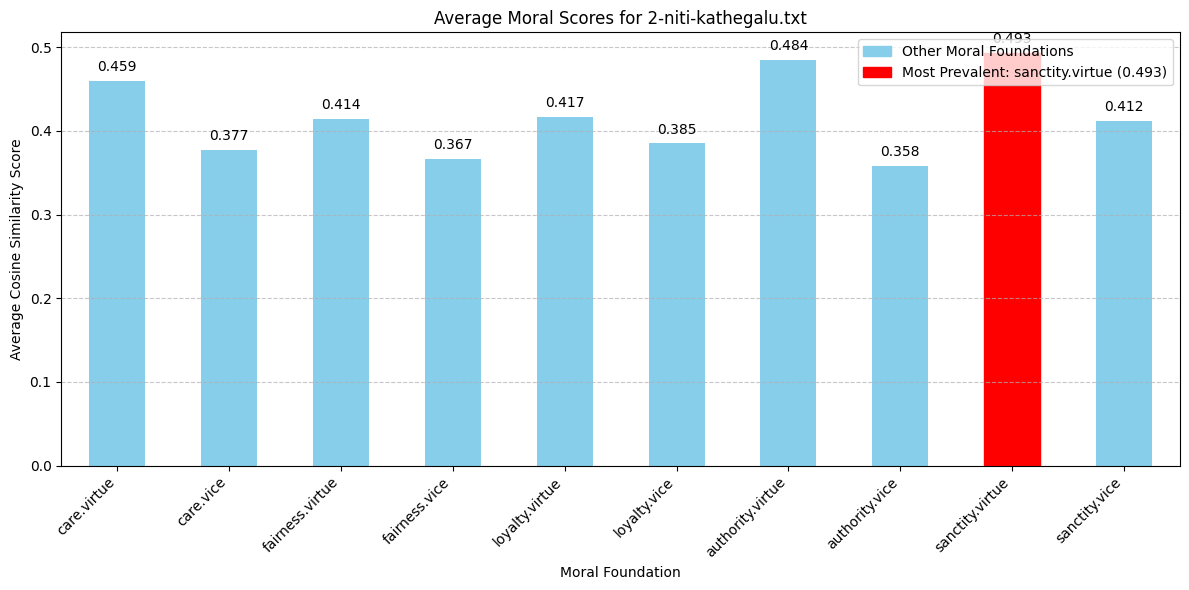

Generated bar plot for 2-niti-kathegalu.txt.


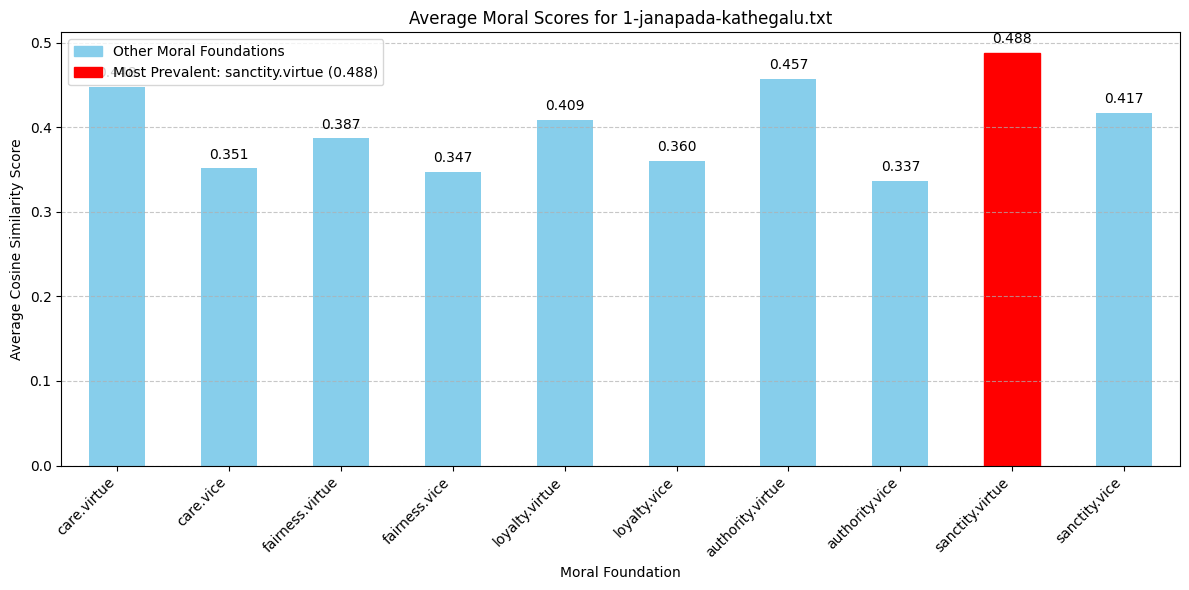

Generated bar plot for 1-janapada-kathegalu.txt.


In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch # Import Patch for custom legend entry

for filename, scores in text_average_moral_scores.items():
    # Convert scores to a pandas Series for easier plotting
    scores_series = pd.Series(scores)

    plt.figure(figsize=(12, 6))
    ax = scores_series.plot(kind='bar', color='skyblue')

    # Identify the most prevalent moral foundation directly from scores
    max_foundation = max(scores, key=scores.get)
    max_score = scores[max_foundation]

    # Find the index of the most prevalent moral foundation and change its color
    for i, foundation_name in enumerate(scores_series.index):
        if foundation_name == max_foundation:
            ax.patches[i].set_color('red')
            break # Found and colored, exit loop

    # Add exact values on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'Average Moral Scores for {filename}')
    plt.xlabel('Moral Foundation')
    plt.ylabel('Average Cosine Similarity Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Create custom legend handles and labels
    legend_handles = [Patch(color='skyblue', label='Other Moral Foundations'),
                      Patch(color='red', label=f'Most Prevalent: {max_foundation} ({max_score:.3f})')]
    plt.legend(handles=legend_handles)

    plt.tight_layout()
    plt.show()
    print(f"Generated bar plot for {filename}.")

# **Cosine Similarity doesn't capture Variation/Ranks of morals well.**
# **We will identify a "dominant" moral through distribution method**

## Identify Dominant Moral Foundation per Paragraph

### Subtask:
For each paragraph in `paragraph_moral_scores`, determine the moral foundation with the highest cosine similarity score. Store this dominant foundation for each paragraph.


### Reasoning:
To identify the dominant moral foundation for each paragraph, I will iterate through the `paragraph_moral_scores` dictionary. For each paragraph, I'll find the foundation with the highest cosine similarity score and store this information in a new dictionary. This approach ensures that each paragraph's primary moral theme is explicitly captured.

**Reasoning**:
I will implement the logic to iterate through `paragraph_moral_scores`, find the dominant moral foundation for each paragraph, and store it in a new dictionary, as per the instructions.



In [45]:
dominant_moral_per_paragraph = {}

# Iterate through each entry in the paragraph_moral_scores dictionary
for (filename, paragraph_index), scores in paragraph_moral_scores.items():
    if scores:
        # Find the moral foundation with the maximum score
        dominant_foundation = max(scores, key=scores.get)
        dominant_score = scores[dominant_foundation]

        # Store the identified dominant moral foundation and its corresponding score
        dominant_moral_per_paragraph[(filename, paragraph_index)] = {
            'dominant_foundation': dominant_foundation,
            'score': dominant_score
        }
    else:
        dominant_moral_per_paragraph[(filename, paragraph_index)] = {
            'dominant_foundation': 'None',
            'score': 0.0
        }

print(f"Identified dominant moral foundation for {len(dominant_moral_per_paragraph)} paragraphs.")
print("Example for the first paragraph:")
if dominant_moral_per_paragraph:
    first_key = list(dominant_moral_per_paragraph.keys())[0]
    print(f"  Key: {first_key}")
    print(f"  Dominant Foundation: {dominant_moral_per_paragraph[first_key]['dominant_foundation']}")
    print(f"  Score: {dominant_moral_per_paragraph[first_key]['score']:.4f}")

Identified dominant moral foundation for 436 paragraphs.
Example for the first paragraph:
  Key: ('2-niti-kathegalu.txt', 0)
  Dominant Foundation: sanctity.virtue
  Score: 0.4463


## Export Paragraph-Level Moral Scores to CSV

### Subtask:
For each text file, generate a detailed CSV containing paragraph-level information including paragraph number, text content, all moral foundation scores, dominant moral, and dominant score.

In [49]:
import pandas as pd
import os

# Create output directory
output_dir = '../phase3_outputs/kannada'
os.makedirs(output_dir, exist_ok=True)

# Directory containing the original cleaned text files
text_files_dir = 'kannada-pre-processed'

# Get list of moral foundations
moral_foundations = list(master_moral_vectors_kannada.keys())

print("Generating paragraph-level CSV files for each text...")
print("=" * 80)

# Process each file
for filename in set([key[0] for key in paragraph_moral_scores.keys()]):
    print(f"\nProcessing: {filename}")
    
    # Load the original text to get paragraph content
    text_file_path = os.path.join(text_files_dir, filename)
    
    if os.path.exists(text_file_path):
        with open(text_file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            paragraphs = [p.strip() for p in content.split('---') if p.strip()]
    else:
        print(f"  Warning: Could not find text file at {text_file_path}")
        paragraphs = []
    
    # Collect data for this file
    rows = []
    
    for (file, para_idx), scores in paragraph_moral_scores.items():
        if file == filename:
            # Get paragraph text
            para_text = paragraphs[para_idx] if para_idx < len(paragraphs) else ""
            
            # Get dominant moral info
            dominant_info = dominant_moral_per_paragraph.get((file, para_idx), {})
            dominant_moral = dominant_info.get('dominant_foundation', 'None')
            dominant_score = dominant_info.get('score', 0.0)
            
            # Build row
            row = {
                'para_number': para_idx + 1,  # 1-indexed
                'text': para_text
            }
            
            # Add all moral foundation scores
            for foundation in moral_foundations:
                row[foundation] = scores.get(foundation, 0.0)
            
            # Add dominant moral and score
            row['dominant_moral'] = dominant_moral
            row['dominant_score'] = dominant_score
            
            rows.append(row)
    
    # Create DataFrame
    if rows:
        df = pd.DataFrame(rows)
        
        # Sort by paragraph number
        df = df.sort_values('para_number')
        
        # Define output path
        output_filename = filename.replace('.txt', '_moral_scores.csv')
        output_path = os.path.join(output_dir, output_filename)
        
        # Save to CSV
        df.to_csv(output_path, index=False, encoding='utf-8')
        
        print(f"  ✓ Saved {len(rows)} paragraphs to {output_path}")
        print(f"    Columns: {', '.join(df.columns)}")
    else:
        print(f"  ⚠ No data found for {filename}")

print("\n" + "=" * 80)
print(f"✓ CSV export complete! Files saved to {output_dir}/")

Generating paragraph-level CSV files for each text...

Processing: 2-niti-kathegalu.txt
  ✓ Saved 216 paragraphs to ../phase3_outputs/kannada/2-niti-kathegalu_moral_scores.csv
    Columns: para_number, text, care.virtue, care.vice, fairness.virtue, fairness.vice, loyalty.virtue, loyalty.vice, authority.virtue, authority.vice, sanctity.virtue, sanctity.vice, dominant_moral, dominant_score

Processing: 1-janapada-kathegalu.txt
  ✓ Saved 220 paragraphs to ../phase3_outputs/kannada/1-janapada-kathegalu_moral_scores.csv
    Columns: para_number, text, care.virtue, care.vice, fairness.virtue, fairness.vice, loyalty.virtue, loyalty.vice, authority.virtue, authority.vice, sanctity.virtue, sanctity.vice, dominant_moral, dominant_score

✓ CSV export complete! Files saved to ../phase3_outputs/kannada/


## Aggregate Dominant Morals per Text

### Subtask:
For each text (filename), count the occurrences of each dominant moral foundation identified in its paragraphs. This will show how many paragraphs within a text are primarily associated with each moral foundation.


**Reasoning**:
To achieve the subtask of counting dominant moral foundations per text, I need to implement the iteration and aggregation logic as described in the instructions. This involves initializing a dictionary, iterating through the `dominant_moral_per_paragraph` dictionary, and updating counts for each foundation per text.



In [46]:
text_dominant_foundation_counts = {}

# Iterate through the dominant_moral_per_paragraph dictionary
for (filename, paragraph_index), data in dominant_moral_per_paragraph.items():
    dominant_foundation = data['dominant_foundation']

    # Initialize entry for filename if it doesn't exist
    if filename not in text_dominant_foundation_counts:
        text_dominant_foundation_counts[filename] = {}

    # Increment the count for the dominant foundation
    text_dominant_foundation_counts[filename][dominant_foundation] = \
        text_dominant_foundation_counts[filename].get(dominant_foundation, 0) + 1

print(f"Aggregated dominant moral foundation counts for {len(text_dominant_foundation_counts)} texts.")
print("Example for the first text:")
if text_dominant_foundation_counts:
    first_filename = list(text_dominant_foundation_counts.keys())[0]
    print(f"  Filename: {first_filename}")
    print(f"  Dominant Foundation Counts: {text_dominant_foundation_counts[first_filename]}")

Aggregated dominant moral foundation counts for 2 texts.
Example for the first text:
  Filename: 2-niti-kathegalu.txt
  Dominant Foundation Counts: {'sanctity.virtue': 123, 'care.virtue': 22, 'care.vice': 2, 'authority.virtue': 66, 'loyalty.virtue': 3}


## Normalize and Visualize Dominant Moral Distributions

### Subtask:
Convert the counts of dominant moral foundations per text into proportions or percentages. Then, generate visualizations (e.g., bar charts or pie charts) for each text to display these distributions, showing the breakdown of dominant moral foundations.


**Reasoning**:
First, I will calculate the proportion of each dominant moral foundation for each text by dividing the count of each foundation by the total number of paragraphs in that text. This will convert the raw counts into a normalized distribution.



In [47]:
text_dominant_foundation_proportions = {}

for filename, foundation_counts in text_dominant_foundation_counts.items():
    total_paragraphs_in_text = paragraph_counts.get(filename, 0)

    if total_paragraphs_in_text > 0:
        proportions = {
            foundation: count / total_paragraphs_in_text
            for foundation, count in foundation_counts.items()
        }
        text_dominant_foundation_proportions[filename] = proportions
    else:
        text_dominant_foundation_proportions[filename] = {}

print("Calculated dominant moral foundation proportions for each text.")
for filename, proportions in text_dominant_foundation_proportions.items():
    print(f"  Filename: {filename}")
    print(f"  Proportions: {proportions}")

Calculated dominant moral foundation proportions for each text.
  Filename: 2-niti-kathegalu.txt
  Proportions: {'sanctity.virtue': 0.5694444444444444, 'care.virtue': 0.10185185185185185, 'care.vice': 0.009259259259259259, 'authority.virtue': 0.3055555555555556, 'loyalty.virtue': 0.013888888888888888}
  Filename: 1-janapada-kathegalu.txt
  Proportions: {'sanctity.virtue': 0.8409090909090909, 'authority.virtue': 0.08181818181818182, 'care.virtue': 0.06363636363636363, 'sanctity.vice': 0.00909090909090909, 'loyalty.virtue': 0.004545454545454545}


**Reasoning**:
Now that the proportions of dominant moral foundations have been calculated for each text, I will generate bar charts to visualize these distributions as specified in the subtask. This will involve iterating through the calculated proportions and plotting them using matplotlib and pandas.



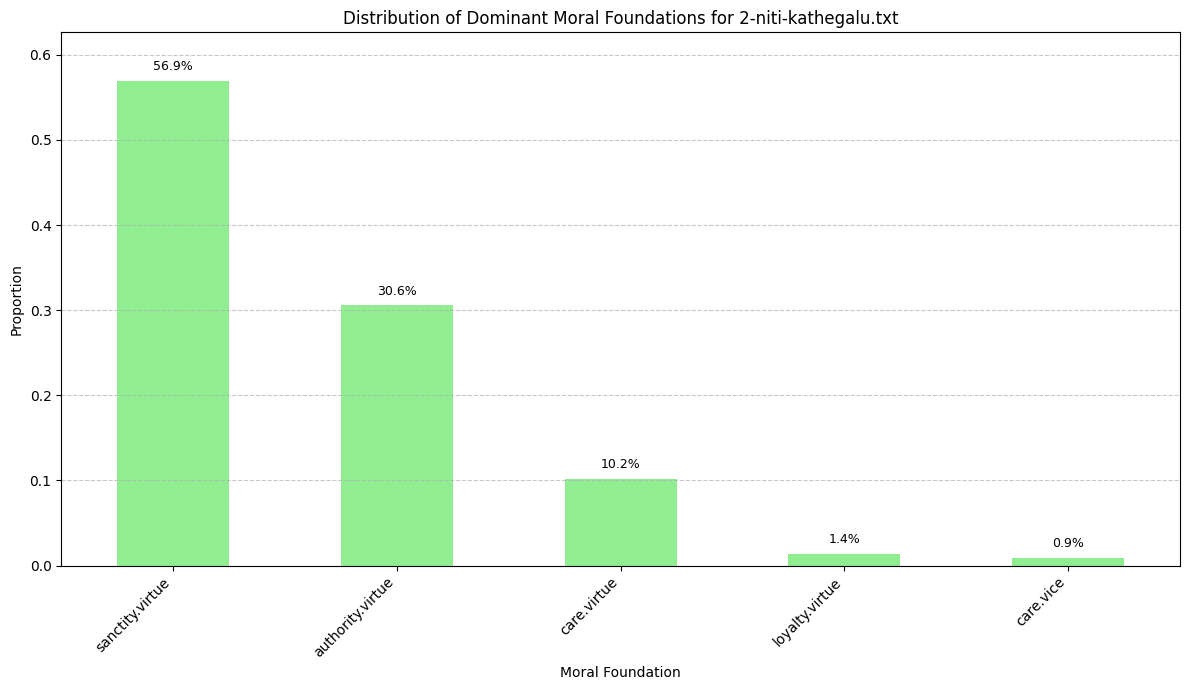

Generated bar chart for 2-niti-kathegalu.txt.


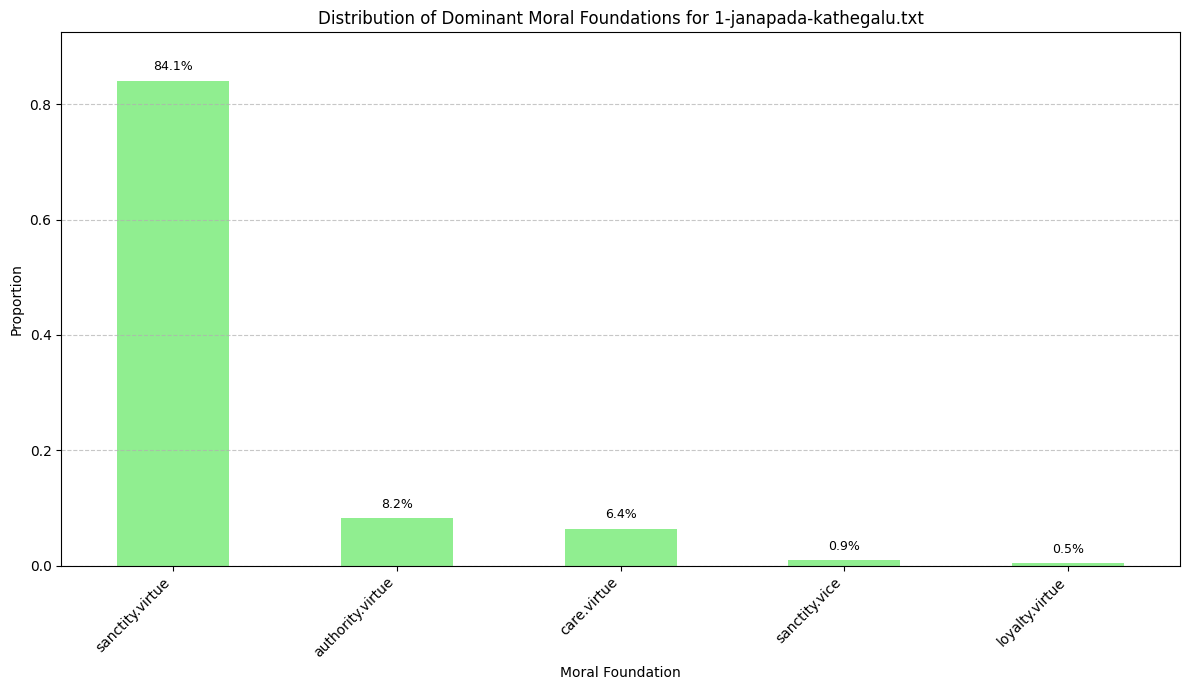

Generated bar chart for 1-janapada-kathegalu.txt.


In [48]:
import matplotlib.pyplot as plt
import pandas as pd

for filename, proportions in text_dominant_foundation_proportions.items():
    if not proportions:
        print(f"No dominant moral foundations to visualize for {filename}.")
        continue

    # Convert proportions to a pandas Series for easier plotting
    proportions_series = pd.Series(proportions)

    # Sort the series by proportion for better visualization
    proportions_series = proportions_series.sort_values(ascending=False)

    plt.figure(figsize=(12, 7))
    ax = proportions_series.plot(kind='bar', color='lightgreen')

    # Add exact percentage values on top of each bar
    for p in ax.patches:
        percentage = f"{p.get_height() * 100:.1f}%"
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=9)

    plt.title(f'Distribution of Dominant Moral Foundations for {filename}')
    plt.xlabel('Moral Foundation')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(proportions_series.values) * 1.1) # Adjust y-limit for better visual
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print(f"Generated bar chart for {filename}.")